# First Assignment - Exercise 2


Implement a multilayer perceptron network and use it to approximate the two functions below. Then, compare the results with the exact curves. In the case of problem (b), show the average training error curve concerning the number of seasons and the average error curve with the validation set.

- **(a)** the XOR logic function
- **(b)** $f(x) = \sin(\pi x)/\pi x, 0 < x \le 4$


**Hint:** Select a set of samples for each function (where x is the input and f (x) is the desired output - label). Then, split these samples into training and validation sets. Subsequently, train a multilayer perceptron so that it learns to approach the function from the training sample and tests with the validation set.

In [62]:
from tail_scratch_nn import DNN
from sklearn.metrics import accuracy_score, r2_score
import numpy as np
from data_generator import DataGenerator, f
import matplotlib.pyplot as plt

## Problem (a)

In [2]:
generator =  DataGenerator()
X_train, X_test, y_train, y_test = generator.generate_problem_A()

[0 0] => [1 0]
[0 1] => [0 1]
[1 0] => [0 1]
[1 1] => [1 0]


In [3]:
neural_net = DNN()
neural_net.fit(X_train.T, y_train.T, X_test.T, y_test.T,hidden = 'relu', output = 'softmax')

In [4]:
X_train.T

array([[0, 0, 1, 1],
       [0, 1, 0, 1]])

In [5]:
y_train.T

array([[1, 0, 0, 1],
       [0, 1, 1, 0]])

EPOCH 0 Train cost : 0.69312578 | val cost : 0.69312578
EPOCH 3 Train cost : 0.69307004 | val cost : 0.69307004
EPOCH 6 Train cost : 0.69276368 | val cost : 0.69276368
EPOCH 9 Train cost : 0.69232103 | val cost : 0.69232103
EPOCH 12 Train cost : 0.69189965 | val cost : 0.69189965
EPOCH 15 Train cost : 0.69128346 | val cost : 0.69128346
EPOCH 18 Train cost : 0.69029423 | val cost : 0.69029423
EPOCH 21 Train cost : 0.68844757 | val cost : 0.68844757
EPOCH 24 Train cost : 0.68591881 | val cost : 0.68591881
EPOCH 27 Train cost : 0.6824883 | val cost : 0.6824883
EPOCH 30 Train cost : 0.67824974 | val cost : 0.67824974
EPOCH 33 Train cost : 0.67310708 | val cost : 0.67310708
EPOCH 36 Train cost : 0.66732749 | val cost : 0.66732749
EPOCH 39 Train cost : 0.66064324 | val cost : 0.66064324
EPOCH 42 Train cost : 0.65319946 | val cost : 0.65319946
EPOCH 45 Train cost : 0.64500394 | val cost : 0.64500394
EPOCH 48 Train cost : 0.63626762 | val cost : 0.63626762
EPOCH 51 Train cost : 0.62629538 | va

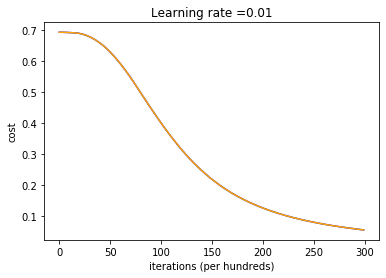

In [6]:
N_ENTRADA = 2
N_SAIDA = 2

neural_net.train([N_ENTRADA,10, N_SAIDA], learning_rate=0.01, iterations=300, adam_optimizer=True)

In [7]:
y_pred = neural_net.predict(X_test.T).T
np.argmax(y_pred, axis = 1)

array([0, 1, 1, 0])

In [8]:
np.argmax(y_test, axis = 1)

array([0, 1, 1, 0])

In [9]:
accuracy_score(np.argmax(y_pred, axis = 1), np.argmax(y_test, axis = 1))

1.0

## Problem (B)

In [25]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense

In [56]:
generator =  DataGenerator()
X_train_B, X_test_B, y_train_B, y_test_B = generator.generate_problem_B(50000, 0.2)

In [57]:

model = Sequential()
model.add(Dense(10, input_shape=(1,), activation='relu'))
model.add(Dense(5, activation='relu'))
model.add(Dense(1, activation='linear'))

In [59]:
model.compile(loss='mean_absolute_error', optimizer='adam', metrics=['mean_squared_error'])
hist = model.fit(X_train_B, y_train_B, epochs=50, batch_size=64, verbose=1, validation_split=0.2)

Train on 32000 samples, validate on 8000 samples
Epoch 1/50
32000/32000 [==============================] - 0s 15us/sample - loss: 0.0564 - mean_squared_error: 0.0061 - val_loss: 0.0554 - val_mean_squared_error: 0.0061
Epoch 2/50
32000/32000 [==============================] - 0s 12us/sample - loss: 0.0564 - mean_squared_error: 0.0061 - val_loss: 0.0555 - val_mean_squared_error: 0.0059
Epoch 3/50
32000/32000 [==============================] - 0s 12us/sample - loss: 0.0564 - mean_squared_error: 0.0061 - val_loss: 0.0553 - val_mean_squared_error: 0.0059
Epoch 4/50
32000/32000 [==============================] - 0s 11us/sample - loss: 0.0564 - mean_squared_error: 0.0061 - val_loss: 0.0553 - val_mean_squared_error: 0.0060
Epoch 5/50
32000/32000 [==============================] - 0s 12us/sample - loss: 0.0565 - mean_squared_error: 0.0061 - val_loss: 0.0556 - val_mean_squared_error: 0.0059
Epoch 6/50
32000/32000 [==============================] - 0s 12us/sample - loss: 0.0564 - mean_squared_err

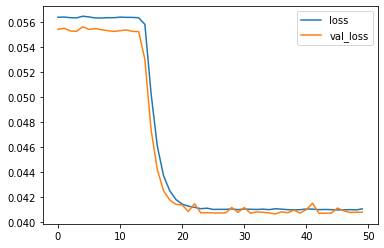

In [60]:
plt.plot(hist.history["loss"], label="loss")
plt.plot(hist.history["val_loss"], label="val_loss")
plt.legend()

In [67]:
y_pred = model.predict(X_test_B)
print(f'Acurácia: {round(r2_score(y_test_B, y_pred)*100,1)}%')

Acurácia: 95.9%
